# <span style="color:#fc6d19;">**Relazione Multimedia (LM-18)**:</span>  


<span style="color:#fc6d19;">**Nome**:</span> *Salvatore Mario*

<span style="color:#fc6d19;">**Cognome**:</span> *Carota*

<span style="color:#fc6d19;">**Matricola**:</span> 1000015001

# <span style="color:#fc6d19;">**Introduzione**</span> 

Il restauro dei video d'epoca è una sfida affascinante nel campo dell'elaborazione delle immagini e del video, poiché implica la preservazione e l'ottimizzazione di contenuti storici spesso danneggiati o di bassa qualità. Grazie ai progressi nel machine learning e nell'intelligenza artificiale, oggi è possibile applicare algoritmi avanzati per migliorare la qualità visiva di questi materiali, rendendoli più nitidi e dettagliati.

L'obiettivo principale di questo progetto è restaurare video d’epoca, con un’attenzione particolare all’aumento della risoluzione e alla riduzione del rumore visivo. A tal fine, verranno impiegati due avanzati algoritmi di super-risoluzione basati su deep learning: SwinIR e Real-ESRGAN. Questi modelli sono in grado di ricostruire dettagli ad alta definizione a partire da immagini o video a bassa risoluzione, migliorando significativamente la qualità del risultato finale.

Oltre all'incremento della risoluzione, il progetto mira a ridurre il rumore e le distorsioni tipiche dei video d’epoca, spesso compromessi da imperfezioni dovute al tempo e ai limiti tecnologici dell’epoca. Il risultato atteso è un video restaurato che non solo preserva il suo valore storico, ma diventa anche più fruibile e godibile per il pubblico moderno.

# <span style="color:#fc6d19;">**Metodi**</span> 

## <span style="color:#fc6d19;">**SwinIR**:</span> 

link: https://arxiv.org/pdf/2108.10257

**SwinIR** è composto da tre parti: **shallow feature extraction**, **deep feature extraction** e **HQ image reconstruction**. In particolare, il modulo deep feature extraction è costituito da diversi blocchi di **Swin Transformer blocks (RSTB)**, ognuno dei quali include diversi layer Swin Transformer layers insieme a una connessione residua.
Gli esperimenti su diverse attività, come la super-risoluzione, il denoising e la riduzione degli artefatti JPEG, hanno dimostrato che SwinIR supera i metodi esistenti, migliorando la qualità dell'immagine e riducendo i parametri del modello fino al 67%.

Una connessione residua permette di apprende a calcolare un residuo, ovvero un insieme di informazioni che rappresentano le correzioni necessarie per migliorare l'immagine originale.
Attraverso le connessioni residue, il modello somma questo residuo all'input iniziale per ottenere l'immagine finale restaurata. Questo approccio consente di preservare meglio i dettagli originali, evitando che il modello modifichi eccessivamente le caratteristiche dell'immagine di partenza. Inoltre, migliora la stabilità dell'addestramento e accelera il processo di restauro, poiché il modello si concentra solo sulle differenze da correggere, piuttosto che generare l'intera immagine da zero.




SwinIR fa uso dei **Transformer**, una tecnologia ampiamente adottata nella **computer vision** per compiti come classificazione, rilevamento degli oggetti e segmentazione, grazie alla sua capacità di catturare le interazioni globali tra diverse regioni di un'immagine.  

Di recente, i Transformer sono stati introdotti anche nel **restauro delle immagini**, ma modelli come **IPT** e **VSR-Transformer** presentano alcune sfide, tra cui l'elevato numero di parametri e la necessità di dataset di grandi dimensioni per un addestramento efficace. Inoltre, entrambi i modelli utilizzano il meccanismo di attenzione a livello di **patch**, che potrebbe non essere ottimale per il restauro delle immagini.  

Un'alternativa a questo approccio ha esplorato l'uso del **Swin Transformer** all'interno di un'architettura a forma di **U**, progettata per affrontare queste problematiche in modo più efficiente, migliorando il bilanciamento tra qualità del restauro e complessità computazionale. 

### <span style="color:#fc6d19;">**Architettura rete neurale**</span> 

<p align="center">
    <img src="img_relazione/swinIR_net.png" alt="SwinIt network" width="60%" height="60%">
</p>


L'immagine illustra la struttura di SwinIR, che si compone di tre moduli principali: estrazione delle caratteristiche superficiali, estrazione delle caratteristiche profonde e ricostruzione dell'immagine ad alta qualità (HQ). SwinIR consente di selezionare il tipo di operazione desiderata tra denoising, restauro ad alta risoluzione e riduzione degli artefatti da compressione JPEG. Pur utilizzando gli stessi moduli di estrazione delle caratteristiche per tutti i compiti di restauro, vengono impiegati moduli di ricostruzione differenti a seconda del compito specifico.

### <span style="color:#fc6d19;">**Shallow and deep feature extraction**</span> 
Il processo di estrazione delle caratteristiche in SwinIR avviene in due fasi: superficiale e profonda. Nella prima fase, viene utilizzato uno strato convoluzionale 3x3 per estrarre le caratteristiche superficiali da un'immagine di bassa qualità. Nella fase successiva, le caratteristiche superficiali vengono ulteriormente elaborate attraverso un modulo di estrazione delle caratteristiche profonde, che include più blocchi residui **Swin Transformer (RSTB)** e un altro strato convoluzionale. Questo approccio combina i benefici delle convoluzioni iniziali con l'auto-attenzione dei Transformer, creando una solida base per l'aggregazione delle caratteristiche superficiali e profonde per il restauro dell'immagine.

### <span style="color:#fc6d19;">**HQ Image reconstruction**</span>  
In SwinIR, per la super-risoluzione dell'immagine (SR), l'immagine ad alta qualità viene ricostruita aggregando le caratteristiche superficiali e profonde. Le caratteristiche superficiali contengono basse frequenze, mentre quelle profonde si concentrano sul recupero delle alte frequenze. Una lunga connessione saltata consente di trasmettere direttamente l'informazione a bassa frequenza al modulo di ricostruzione, migliorando la stabilità dell'addestramento. 

Il modulo di ricostruzione utilizza una c**onvoluzione sub-pixel** per aumentare la risoluzione. Per compiti come il denoising e la riduzione degli artefatti JPEG, viene usato un singolo strato convoluzionale. Inoltre, SwinIR utilizza l'apprendimento residuo per ricostruire la differenza tra l'immagine di bassa qualità (LQ) e quella ad alta qualità (HQ), migliorando l'efficienza del restauro.

La **convoluzione sub-pixel** è una tecnica usata nella super-risoluzione per aumentare la risoluzione di un'immagine in modo efficiente. Invece di eseguire un upsampling tradizionale, il modello genera un'output con più canali e utilizza un'operazione chiamata pixel shuffle, che riorganizza i canali extra in pixel distribuiti spazialmente, aumentando la risoluzione.

Questo metodo è più veloce e produce immagini di qualità superiore rispetto ad altre tecniche di upsampling, riducendo artefatti e migliorando la nitidezza.


### <span style="color:#fc6d19;">**Residual Swin Transformer Block**</span> 
 **(RSTB)** è un blocco residuo che combina strati di **Swin Transformer (STL)** e strati convoluzionali. Inizia estraendo caratteristiche intermedie tramite più strati **Swin Transformer**, e aggiunge uno strato convoluzionale prima della connessione residua. L'output finale viene ottenuto sommando l'output del convoluzionale con l'input originale del blocco. La connessione residua permette l'aggregazione di caratteristiche a vari livelli, favorendo una connessione diretta tra i blocchi e il modulo di ricostruzione.

### <span style="color:#fc6d19;">**Swin Transformer Layer (STL)**  </span> 

Il **Swin Transformer Layer** (STL) si basa sul meccanismo di **Self-Attention Multi-Head (MSA)**, introducendo l’**local attention** e **Shifted Windows**.  

L’**attenzione multi-head** è un elemento centrale nei modelli Transformer, utilizzato per analizzare le relazioni tra diverse parti di un input, come parole in una frase o pixel in un’immagine. Questo meccanismo permette al modello di concentrarsi simultaneamente su diverse regioni, migliorando la capacità di catturare le dipendenze tra le informazioni.  

### <span style="color:#fc6d19;">**Fasi del Swin Transformer Layer**</span>

1. **Suddivisione dell’input** – L’immagine viene divisa in **finestre locali** di dimensione ( M x M ), senza sovrapposizione. L’attenzione viene poi calcolata separatamente per ogni finestra.  

2. **Self-Attention Locale** – Per ogni finestra vengono generate tre matrici:  
   - **Query (Q)**: rappresenta gli elementi su cui il modello deve concentrarsi.  
   - **Key (K)**: contiene informazioni su tutti gli elementi della finestra per il confronto.  
   - **Value (V)**: memorizza i valori effettivi da aggregare.  
   L'attenzione viene quindi calcolata per ogni finestra utilizzando la funzione **SoftMax** normalizzata.  

3. **Multi-Head Self-Attention (MSA)** – Il processo di attenzione viene eseguito in parallelo con più "teste", migliorando la capacità di apprendere relazioni complesse. I risultati vengono poi concatenati per formare una rappresentazione più ricca.  

4. **Trasformazione delle caratteristiche** – Dopo l’attenzione, i dati passano attraverso una **rete neurale feed-forward** composta da due strati completamente connessi e una funzione di attivazione **GELU** (Gaussian Error Linear Unit).

5. **Finestre mobili (Shifted Windows)** – Per consentire al modello di connettere informazioni tra diverse finestre, vengono alternati due tipi di suddivisioni: una standard e una con **finestre leggermente spostate**. Questo meccanismo permette di catturare meglio sia i dettagli locali che le relazioni tra diverse parti dell’immagine.  

## <span style="color:#fc6d19;">**Real-ESRGAN**</span> 

link: https://arxiv.org/pdf/2107.10833

**Real-ESRGAN** è un modello di super-risoluzione delle immagini che viene addestrato esclusivamente con dati sintetici. Per migliorare la simulazione delle **degradazioni complesse del mondo reale**, il modello introduce un processo di **modellazione della degradazione di ordine superiore**. Inoltre, vengono considerati artefatti comuni, come il **ringing** e l'**overshoot**, che possono verificarsi durante il processo di sintesi.

- **Ringing**: Artefatti visibili come onde o oscillazioni ai bordi, causati dalla perdita di alta frequenza.
- **Overshoot**: Eccessiva saturazione o picchi nei valori di pixel, spesso visibili ai bordi degli oggetti o nelle transizioni di colore, causati da un'eccessiva amplificazione durante il processo di ricostruzione.

<p align="center">
    <img src="img_relazione/ESRGAN_de.png" alt="SwinIt network" width="80%" height="80%">
</p>

### <span style="color:#fc6d19;">**Degradation Models**  </span> 
**Real-ESRGAN**  propone un **modello di degradazione flessibile di ordine superiore**, in grado di sintetizzare degradazioni più realistiche e pratiche, migliorando così l'efficacia dei modelli di **super-risoluzione** nell'affrontare scenari del mondo reale. 

L'immagine mostra i processi usati per la generazione di dati sintetici puri per simulare degradazioni pratiche in modo più realistico. Il modello adotta un processo di degradazione di secondo ordine, dove ogni degradazione segue il modello classico di degradazione. Le scelte dettagliate per i vari tipi di degradazione, come sfocatura, ridimensionamento, rumore e compressione JPEG, sono specificate nel processo.
Inoltre, per sintetizzare artefatti comuni come il ringing e l'overshoot, viene impiegato un filtro sinc. Questo approccio aiuta a generare immagini sintetiche che rispecchiano meglio le complessità delle degradazioni nel mondo reale.

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$


<p align="center">
    <img src="img_relazione/ESRGAN_net.png" alt="SwinIt network" width="80%" height="80%">
</p>


**Real-ESRGAN** adotta lo stesso **network generatore** di **ESRGAN**. Per i fattori di scala **×2** e **×1**, inizialmente esegue un'operazione di **pixel-unshuffle** per ridurre la dimensione spaziale e riorganizzare le informazioni nella dimensione dei canali. 
Questa operazione aiuta a preparare i dati per un successivo miglioramento della risoluzione, ottimizzando il processo di super-risoluzione nelle immagini.

**ESRGAN** utilizza l'architettura di base di **SRResNet**, dove la maggior parte dei calcoli avviene nello spazio delle **caratteristiche a bassa risoluzione (LR)**. È possibile selezionare o progettare **"blocchi base"** (ad esempio, il **residual block**, **dense block**, **RRDB**) per migliorare le prestazioni del modello. 

Per migliorare ulteriormente la qualità dell'immagine recuperata da **SRGAN**, vengono apportate due modifiche principali alla struttura del generatore:

1. **Rimozione di tutti i layer BN** (Batch Normalization).
2. **Sostituzione del blocco base originale** con il nuovo **Residual-in-Residual Dense Block (RRDB)**, che combina una **rete residua multi-livello** e **connessioni dense**.

Queste modifiche mirano a migliorare le prestazioni del modello nella **super-risoluzione** delle immagini, ottimizzando sia la qualità visiva che la stabilità del processo di training.

Poiché ESRGAN è una rete pesante, inizialmente impieghiamo l'operazione di pixel-unshuffle (un'operazione inversa del pixel-shuffle) per ridurre la dimensione spaziale ed espandere la dimensione dei canali prima di fornire gli input alla principale architettura ESRGAN. In questo modo, la maggior parte dei calcoli viene eseguita in uno spazio a risoluzione più piccola, riducendo così il consumo di memoria GPU e risorse computazionali.


# <span style="color:#fc6d19;">**Risultati**</span> 

mettere i valori di denoisinfg usati 

Come primo test, è stato utilizzato il video **Arrivée d'un train en gare à La Ciotat (1895)**. Il video sembra essere stato compresso più volte, con una significativa perdita di qualità, e può essere considerato uno dei casi più difficili da restaurare.

Per il restauro, è stato utilizzato SwinIR, inizialmente per l'operazione di **denoising (DE)** e successivamente per il **miglioramento della risoluzione (HR)**. Questo ordine è stato scelto per evitare problemi di memoria della GPU che si verificano invertendo le due operazioni. 
Per quanto riguarda ESRGAN, ..

Segue l'immagine che mostra i risultati ottenuti 

Frame selezionati: [1, 180, 213, 246, 380]


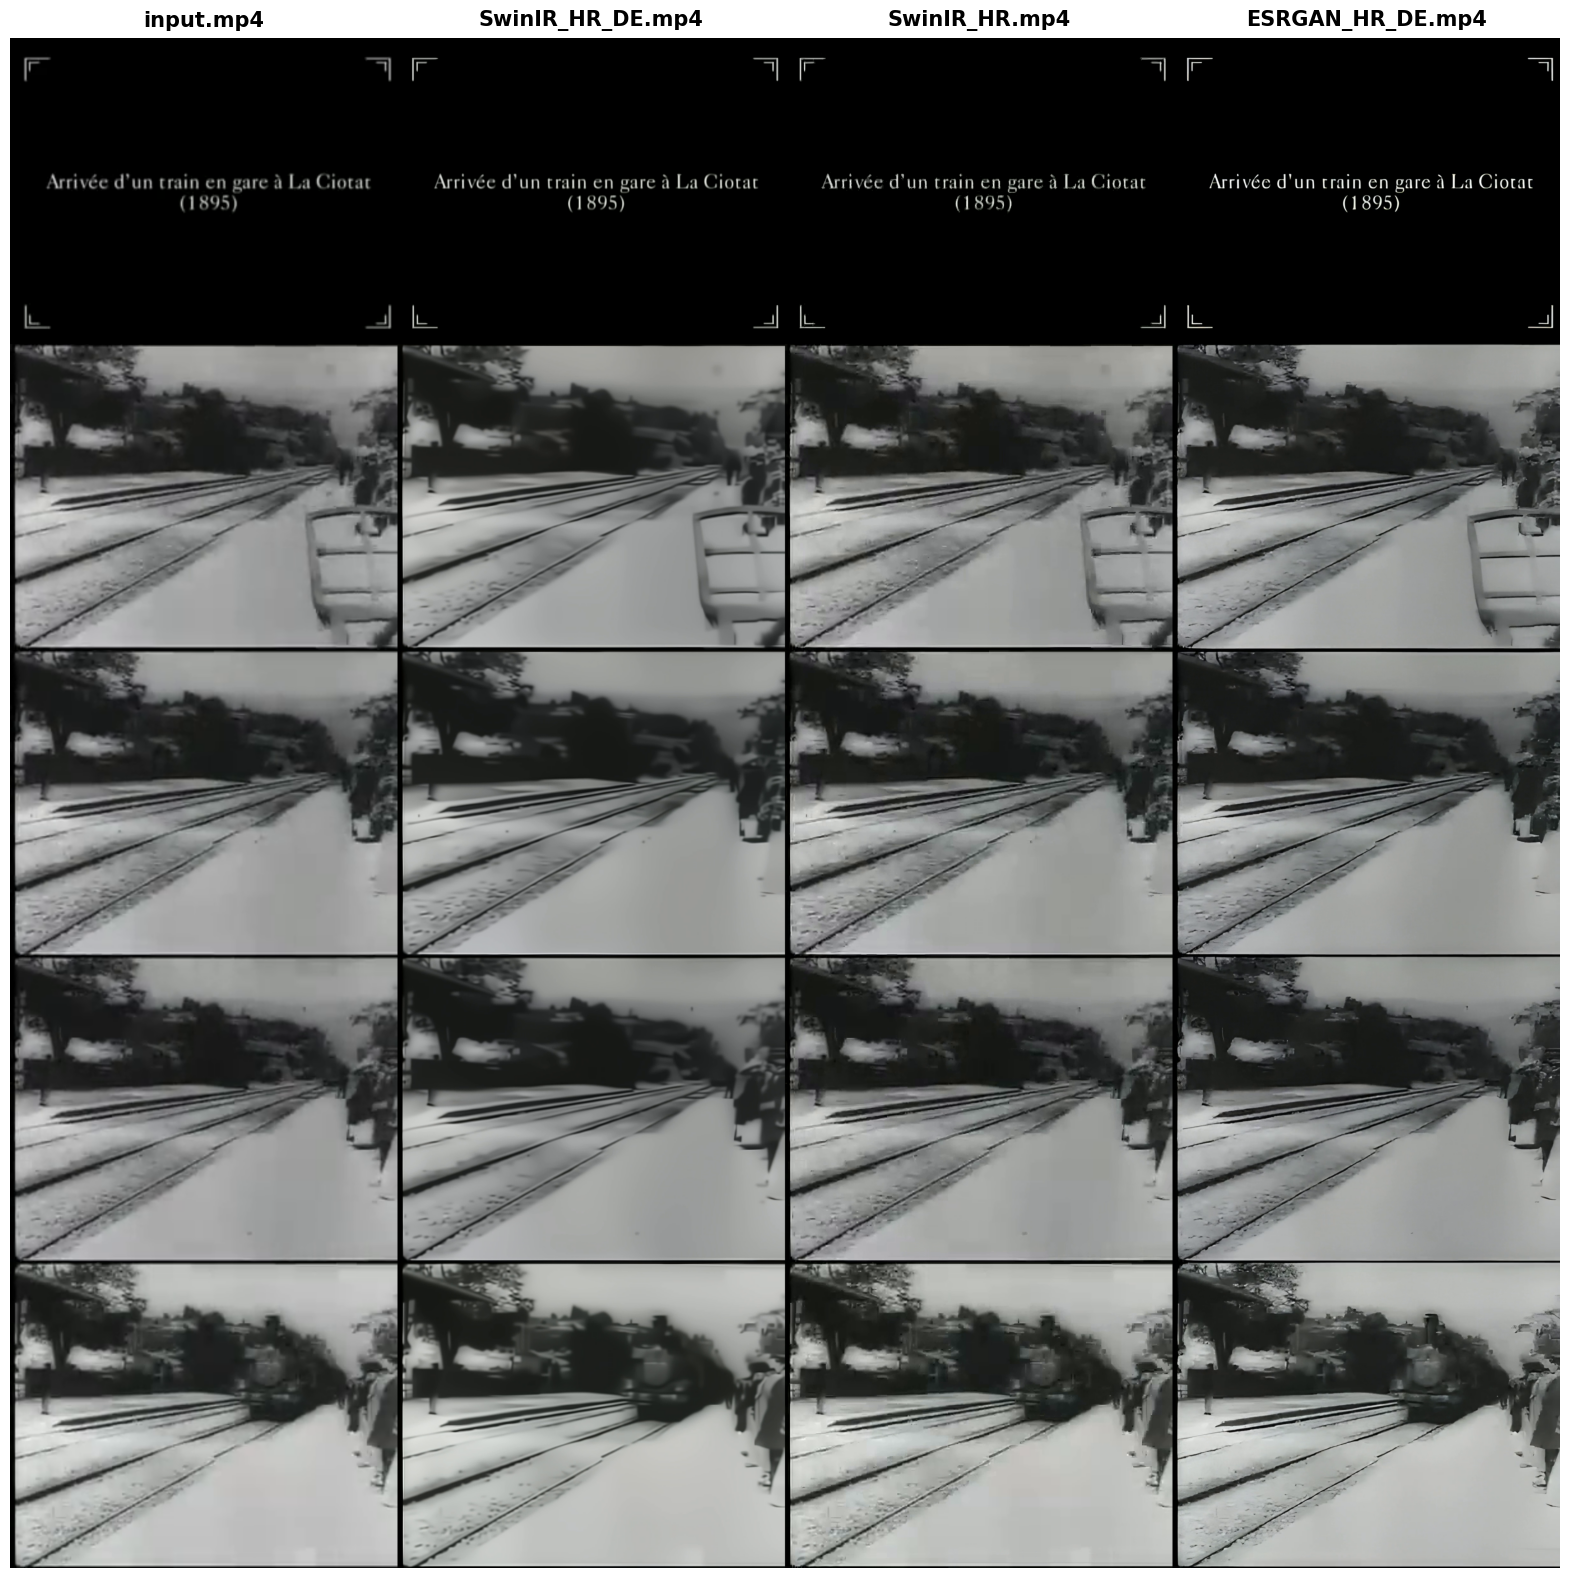

In [1]:
import script as sc

video_paths = [
    "video/input/treno/input.mp4",
    "video/SwinIR/treno/SwinIR_HR_DE.mp4",
    "video/SwinIR/treno/SwinIR_HR.mp4",
    "video/ESRGAN/treno/ESRGAN_HR_DE.mp4"
]
sc.output_img(video_paths)

Si può osservare come SwinIR, durante l'operazione di denoising, appiattisca l'immagine, causando una perdita ulteriore di dettagli. Al contrario, ESRGAN riesce a preservare una maggiore quantità di informazioni e dettagli visivi.

Frame selezionati: [5, 105, 220, 309]


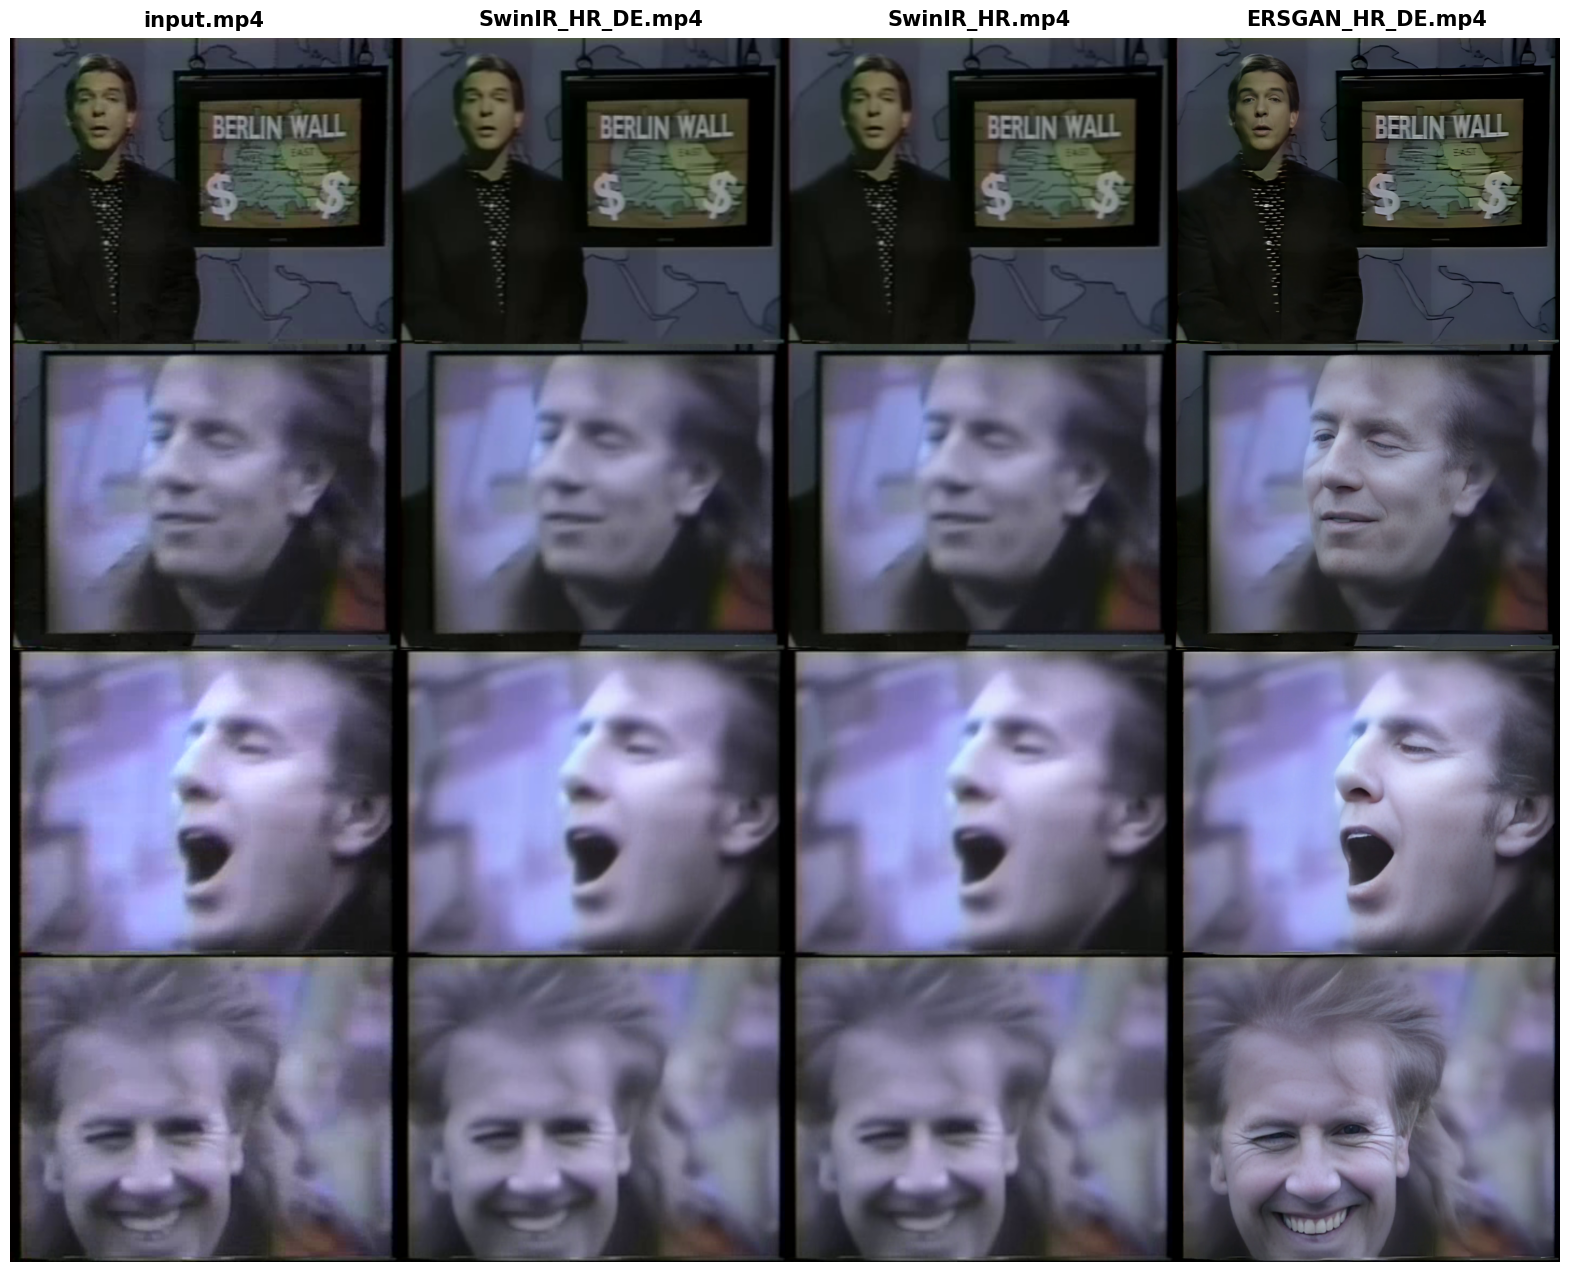

In [19]:
video_paths = [
    "video/input/tg/input.mp4",
    "video/SwinIR/tg/SwinIR_HR_DE.mp4", #da rifare 
    "video/SwinIR/tg/SwinIR_HR.mp4",   #da rifare 
    "video/ESRGAN/tg/ERSGAN_HR_DE.mp4"
]

frames = [5 , 105 , 220 , 309]
sc.output_img(video_paths , frames)

Dai risultati emerge chiaramente che ESRGAN produce risultati significativamente migliori quando sono presenti volti. Questo è dovuto al fatto che ESRGAN è particolarmente efficace nel preservare i dettagli facciali, grazie alla sua capacità di riconoscere e trattare con maggiore precisione le caratteristiche delicate e distintive dei volti, come gli occhi, la pelle e i contorni.

# <span style="color:#fc6d19;"> **Conclusione**</span>

Prendere in considerazioneil fattpo che sononstati usati i modelli pre allenati e il vantaggio di ESRGAN allenato sul suo metodo di uso dei dati sintetici potrebbe aver reso il modello piu generale rispetto a SwinIR 